# LOG
画像データの配列の最後尾にindex数を付加する方法、どうやってもaccuracyが0.3を超えない。

In [1]:
# 機械学習のライブラリ関連をインポート
import pandas as pd
import numpy as np

# ランダムにシャッフルして，学習・テストに分割するモジュール
from sklearn.model_selection import ShuffleSplit

# 深層学習のライブラリをインポート
import tensorflow as tf
import tensorflow.keras as keras

#表示系のインポートと設定
%matplotlib inline
import matplotlib.pyplot as plt

# ファイル操作
import os

# 画像操作
from PIL import Image

In [2]:
# DIRS
DIRS_DATASET = "../Training/Datasets1000/"

In [3]:
file_names = []
    
# フォルダ内のファイルを取得
files = os.listdir(DIRS_DATASET)

# ファイル名を配列に格納
for file in files:
    file_names.append(file)

# Pythonリスト型をnumpy.ndarray型に変換
file_names = np.array(file_names)


In [4]:
file_names

array(['4510009042127.jpeg', '4510105440272.jpeg', '4510223601998.jpeg',
       '4510332135594.jpeg', '4510355975107.jpeg', '4510400033707.jpeg',
       '4510446196748.jpeg', '4510496688830.jpeg', '4510596087520.jpeg',
       '4510713958379.jpeg', '4511453880061.jpeg', '4511680952412.jpeg',
       '4512085353817.jpeg', '4512128870743.jpeg', '4512192252237.jpeg',
       '4512225800947.jpeg', '4512325886726.jpeg', '4512513823094.jpeg',
       '4512764777649.jpeg', '4512810649972.jpeg', '4512913271405.jpeg',
       '4513028404552.jpeg', '4513030739585.jpeg', '4513182730613.jpeg',
       '4513464598012.jpeg', '4513506880550.jpeg', '4513803667776.jpeg',
       '4513879488534.jpeg', '4513942000905.jpeg', '4514113592964.jpeg',
       '4514524517625.jpeg', '4514585093662.jpeg', '4514729508475.jpeg',
       '4514778219181.jpeg', '4515083435464.jpeg', '4515263593740.jpeg',
       '4515477254151.jpeg', '4515699808857.jpeg', '4515804763729.jpeg',
       '4515874836002.jpeg', '4516003839524.jpeg', 

In [5]:
# # 学習データとテストデータのインデックスを作成
# train_index, test_index = next(ss.split(file_names))

In [6]:
# file_names_train, file_names_test = file_names[train_index], file_names[test_index] # 学習データ，テストデータ

### 画像をnumpy配列にするための関数

In [7]:
def jpeg_to_numpy(image_path):
    # JPEG画像を開く
    image = Image.open(image_path)
    # NumPy配列に変換
    numpy_array = np.array(image)
    
    return numpy_array

def convert_to_grayscale(numpy_array):
    # 白黒に変換
    grayscale_array = np.array(Image.fromarray(numpy_array).convert('L'))
    # グレーと言わず2値化
    grayscale_array = (grayscale_array > 128) * 255
    plt.imshow(grayscale_array)
    return grayscale_array


### 画像を配列にしてよしなに

In [8]:
X1, X2, y = [], [], []

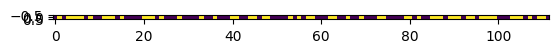

In [9]:
for file_name in file_names:
    numpy_array = jpeg_to_numpy(DIRS_DATASET + file_name)
    grayscale_array = convert_to_grayscale(numpy_array)
    for i in range(13):
        X1.append(grayscale_array)
        X2.append(i)
        y.append(file_name[i])

In [10]:
X1 = np.array(X1)
X2 = np.array(X2)
y = np.array(y, dtype=int)

In [11]:
y

array([4, 5, 1, ..., 7, 8, 0])

In [12]:
# ラベルデータをone-hotベクトルに直す
labels = {
    0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
    6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
    9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
}

y = np.array(list(map(lambda v : labels[v] , y)))

In [13]:
np.set_printoptions(threshold=1000000)
y

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0,

### データの分割

In [14]:
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.8,  # 学習は半分
                  test_size =0.2,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X1))

X1_train, X1_test, X2_train, X2_test = X1[train_index], X1[test_index], X2[train_index], X2[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [15]:
X1

array([[[  0, 255,   0, ..., 255, 255,   0]],

       [[  0, 255,   0, ..., 255, 255,   0]],

       [[  0, 255,   0, ..., 255, 255,   0]],

       ...,

       [[  0, 255,   0, ..., 255, 255,   0]],

       [[  0, 255,   0, ..., 255, 255,   0]],

       [[  0, 255,   0, ..., 255, 255,   0]]])

In [16]:
X2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        0,  1,  2,  3,  4

### ニューラルネットワークの構築

In [26]:

# 学習し、テストデータで評価し、スコアを表示する
# 引数は、中間層の数、バッチサイズ、epoch数

def fit_epoch(neuron, batch, epochs, X1_train, X1_test, X2_train, X2_test, y_train, y_test):
    
    # レイヤーのオブジェクトを作成
    Dense = keras.layers.Dense



    input1 = keras.layers.Input(shape=(X1_train.shape[1], X1_train.shape[2]))
    input2 = keras.layers.Input(shape=(1,))

    flatten1 = keras.layers.Flatten()(input1)
    dense1 = keras.layers.Dense(neuron, activation='relu')(flatten1)
    concatenated = keras.layers.concatenate([dense1, input2])
    output = keras.layers.Dense(10, activation='softmax')(concatenated)

    model = keras.models.Model(inputs=[input1, input2], outputs=output)

    # モデルを構築
    model.compile(
    loss='categorical_crossentropy',
    optimizer='Adamax',
    metrics=['accuracy'])

    # 学習を実行
    hist = model.fit([X1_train, X2_train], y_train,
        batch_size=batch, # 誤差逆伝播法をするときの1回当たりのデータ数
        epochs=epochs,
        verbose=1,
        validation_data=([X1_test, X2_test], y_test))
    
   # モデルを評価
    score = model.evaluate([X1_test, X2_test], y_test, verbose=1)
    print('正解率=', score[1], 'loss=', score[0])
    
     # 学習の様子をグラフへ描画 
    # 正解率の推移をプロット
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # ロスの推移をプロット
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

Epoch 1/2000
4/4 [==============================] - 1s 86ms/step - loss: 141.3917 - accuracy: 0.1108 - val_loss: 278.8141 - val_accuracy: 0.0954
Epoch 2/2000
4/4 [==============================] - 0s 56ms/step - loss: 244.6431 - accuracy: 0.1108 - val_loss: 212.2176 - val_accuracy: 0.1196
Epoch 3/2000
4/4 [==============================] - 0s 67ms/step - loss: 168.0946 - accuracy: 0.1219 - val_loss: 151.1075 - val_accuracy: 0.1185
Epoch 4/2000
4/4 [==============================] - 0s 65ms/step - loss: 136.0540 - accuracy: 0.1138 - val_loss: 128.0172 - val_accuracy: 0.1308
Epoch 5/2000
4/4 [==============================] - 0s 65ms/step - loss: 111.7192 - accuracy: 0.1399 - val_loss: 101.9939 - val_accuracy: 0.1115
Epoch 6/2000
4/4 [==============================] - 0s 62ms/step - loss: 83.8119 - accuracy: 0.1471 - val_loss: 76.1618 - val_accuracy: 0.1585
Epoch 7/2000
4/4 [==============================] - 0s 63ms/step - loss: 68.7542 - accuracy: 0.1499 - val_loss: 66.1529 - val_accura

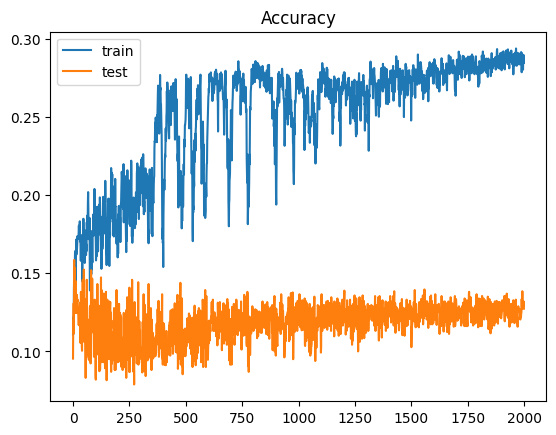

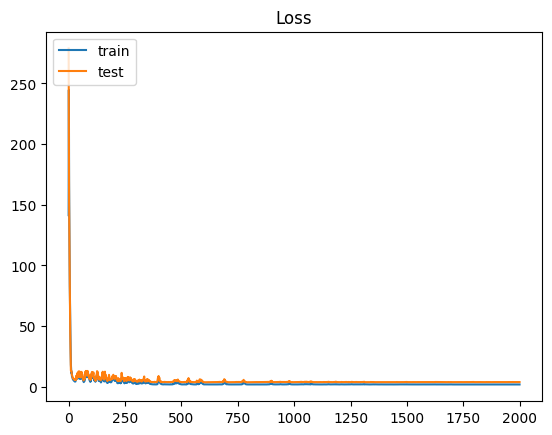

CPU times: total: 5min 6s
Wall time: 8min 29s


In [27]:
%%time
fit_epoch(4000,3000, 2000, X1_train, X1_test, X2_train, X2_test, y_train, y_test)